# Data Analysis: Self-Paced Reading Task


## Research Questions and Predictions


**Research questions**:

1. Are object relative clauses (ORs) parsed slower than subject relative clauses (SRs) by adult Spanish-English bilinguals?

2. If so, does number mismatch between the two determiner phrases (DPs) facilitate their comprehension?

**Predictions**:

1. Adult Spanish-English bilinguals will show shorter reaction times (RTs) in SRs than in ORs.

2. Number mismatch between the two DPs will result in shorter RTs in ORs than number match.


## RT Data Analysis


This is a step by step guide on how the data collected by the self-paced reading task has been analyzed.


### 1. Setting Up


#### Loading Relevant Libraries


The following libraries are imported:

1. `tidyverse`, for cleaner data wrangling functions and access to other included packages, such as `ggplot2`.
2. `ggthemes`, to access the theme `theme_calc()`.
3. `lmerTest`, for more powerful mixed regression models.
4. `gt`, for table creation functions.
5. `broom.mixed`, for converting mixed model output into data frames.
6. `IRdispplay`, for displaying tables in Jupyter Notebook.


In [1]:
library(tidyverse)
library(lmerTest)
library(ggthemes)
library(gt)
library(broom.mixed)
library(IRdisplay)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Cargando paquete requerido: lme4

Cargando paquete requerido: Matrix


Adjuntando el paquete: 'Matrix'


Els seg"uents objectes estan emmascarats des de 'package:tidyr':

    expand, pack, unpack



Adjuntando el paquete: 'lmerTest'


L'objecte seg"uent est`a emmascarat per 'package:lme4':

    lmer


L'objecte seg"uent est`a emmascarat per 'package:stats':

    step




#### Global Variables


##### Colors


In [2]:
accent_color <- "#354c7c"
secondary_color <- "#354b7c2b"


##### Paths


In [3]:
tables_path <- "./images/tables/"
plots_path <- "./images/plots/"


#### Setting Up Default Plot Theme


In [4]:
theme_set(
    theme_calc(
        base_size = 12,
        base_family = "Times"
    ) +
        theme(
            plot.title = element_text(size = 12, face = "bold", margin = margin(b = 10)),
            plot.subtitle = element_text(size = 11, face = "bold"),
            plot.background = element_rect(linewidth = 0),
            strip.background = element_rect(fill = accent_color, color = accent_color),
            strip.text = element_text(color = "white", face = "bold"),
            axis.title.x = element_text(face = "bold", margin = margin(t = 10)),
            axis.title.y = element_text(face = "bold", margin = margin(r = 10)),
            axis.line = element_line(color = accent_color, linewidth = 1),
            axis.ticks = element_blank(),
            legend.title = element_text(face = "bold")
        )
)


### 2. Importing and Processing Data


#### Importing Questionnaire Data


In [5]:
df_part <- read.csv("./data/part_data.csv")
df_part$part_name <- NULL
df_part$part_mail <- NULL
head(df_part)


,X...part_id,part_experiment,part_age,part_lang,part_impaired.,part_abroad,part_certificate,part_cat_exp,part_cat_pro,part_eng_exp,part_eng_pro,part_spa_exp,part_spa_pro,part_eng_onset_method,part_eng_onset_time,Status,part_date
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,22,Pilot,26 - 30,"Catalan, English, Spanish",No,No,B2 (First),< 1h,< 1h,1h - 3h,1h - 3h,> 5h,> 5h,At school,5,Accepted,
2,21,Pilot,26 - 30,"Catalan, Spanish",No,No,C2 (Proficiency),1h - 3h,1h - 3h,> 5h,> 5h,> 5h,> 5h,At school,6,Accepted,
3,20,Pilot,18 - 25,"Catalan, Spanish",No,No,B2 (First),< 1h,< 1h,< 1h,< 1h,> 5h,> 5h,At school,8,Accepted,
4,26,Practicum,18 - 25,"Catalan, Spanish",No,Yes,C1 (Advanced),> 5h,> 5h,1h - 3h,< 1h,3h - 5h,3h - 5h,At school,4,Scheduled,"May 17, 2025 10:00 (GMT+2)"
5,34,TFG,18 - 25,"Catalan, Spanish",No,No,B2 (First),1h - 3h,1h - 3h,3h - 5h,3h - 5h,3h - 5h,3h - 5h,At school,6,Scheduled,"May 7, 2025 11:00 (GMT+2)"
6,33,TFG,18 - 25,"Catalan, English, Spanish",No,Yes,C1 (Advanced),< 1h,< 1h,> 5h,3h - 5h,> 5h,> 5h,At home,0,Scheduled,"May 6, 2025 13:00 (GMT+2)"


#### Cleaning Questionnaire Data


In [6]:
df_part <- df_part %>%
    select(part_experiment, X...part_id, part_lang, part_impaired., part_abroad, part_certificate, part_cat_exp, part_cat_pro, part_spa_exp, part_spa_pro, part_eng_exp, part_eng_pro, part_eng_onset_time) %>%
    mutate(
        across(
            c(part_experiment, X...part_id, part_lang, part_impaired., part_abroad, part_certificate, part_cat_exp, part_cat_pro, part_spa_exp, part_spa_pro, part_eng_exp, part_eng_pro),
            factor
        )
    ) %>%
    filter(part_experiment == "TFG") %>%
    rename(part_id = X...part_id) %>%
    droplevels()

df_part$part_experiment <- NULL

summary(df_part)


 part_id                     part_lang part_impaired. part_abroad
 29:1    Catalan, English, Spanish:1   No:5           No :4      
 31:1    Catalan, Spanish         :3                  Yes:1      
 32:1    Spanish                  :1                             
 33:1                                                            
 34:1                                                            
                                                                 
         part_certificate  part_cat_exp  part_cat_pro  part_spa_exp
 B2 (First)      :1       1h - 3h:2     1h - 3h:1     3h - 5h:3    
 C1 (Advanced)   :3       < 1h   :2     < 1h   :2     > 5h   :2    
 C2 (Proficiency):1       > 5h   :1     > 5h   :2                  
                                                                   
                                                                   
                                                                   
  part_spa_pro  part_eng_exp  part_eng_pro part_eng_onset_time

#### Importing Task Data


First, an example is imported to inspect the data set's variables and their data types.


In [7]:
df_example <- read.csv("./data/32.csv")
glimpse(df_example)


Rows: 309
Columns: 18
$ rt             <int> 2322825, 1536, 1222, 1408, 1249, 1102, 2405, 1727, 1111~
$ response       <chr> "{\"part_id\":\"32\"}", " ", " ", " ", " ", " ", " ", "~
$ trial_type     <chr> "survey-html-form", "html-keyboard-response", "html-key~
$ trial_index    <int> 0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 17, 18,~
$ plugin_version <chr> "2.0.0", "2.0.0", "2.0.0", "2.0.0", "2.0.0", "2.0.0", "~
$ time_elapsed   <int> 2325458, 2368979, 2370201, 2371610, 2372859, 2373964, 2~
$ part_id        <int> 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,~
$ task           <chr> "", "item", "item", "item", "item", "item", "item", "it~
$ item_number    <chr> "", "null", "null", "null", "null", "null", "null", "nu~
$ item_type      <chr> "", "pr_item", "pr_item", "pr_item", "pr_item", "pr_ite~
$ segment        <chr> "", "s0", "s1", "s2", "s3", "s4", "s5", "s0", "s1", "s2~
$ clause_type    <chr> "", "sr", "sr", "sr", "sr", "sr", "sr", "or", "or", "or~
$ number         <

Having done this, now we know which are the specific names of each variable, which ones are of interest and the data type of their values.

We can now proceed to creating the full data set will all our participants' data. This is done by importing them and passing them through the `reduce()` function, which combines all the CSV files into a single data set. The keyword `rbind` makes sure that the individual data sets are merged as additional rows.

Note that only the following columns are selected:

- `part_id`, for the participants' ID number.
- `task`, for the kind of trial, item or question.
- `item_number`, for the items' ID number.
- `item_type`, for the type of item, experimental, practice or filler.
- `clause_type`, for the type fo clause, OR or SR.
- `number`, for the number condition, singular-singular (SS), plural-plural (PP), singular-plural (SP) or plural-singular (PS).
- `segment`, for the segment ID.
- `rt`, for the RTs.
- `correct`, for the accuracy of their responses to question tasks.


In [8]:
df_raw <- reduce(
    list(
        select(read.csv("./data/29.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct),
        select(read.csv("./data/31.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct),
        select(read.csv("./data/32.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct),
        select(read.csv("./data/37.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct)
    ),
    rbind
)
glimpse(df_raw)


Rows: 1,236
Columns: 9
$ part_id     <int> 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29~
$ task        <chr> "", "item", "item", "item", "item", "item", "item", "item"~
$ item_number <chr> "", "null", "null", "null", "null", "null", "null", "null"~
$ item_type   <chr> "", "pr_item", "pr_item", "pr_item", "pr_item", "pr_item",~
$ clause_type <chr> "", "sr", "sr", "sr", "sr", "sr", "sr", "or", "or", "or", ~
$ number      <chr> "", "ss", "ss", "ss", "ss", "ss", "ss", "ss", "ss", "ss", ~
$ segment     <chr> "", "s0", "s1", "s2", "s3", "s4", "s5", "s0", "s1", "s2", ~
$ rt          <int> 2413859, 2521, 405, 368, 350, 382, 376, 1004, 414, 408, 48~
$ correct     <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 1, NA,~


#### Cleaning Task Data


After that, the data is cleaned.

Firstly, the rows are ordered by the participants' ID number with the `order()` function.

Secondly, the observations are filtered using the `filter()` function, keeping only those that involve experimental items and excluding question tasks.

Then, the function `mutate()` is used to transform the data types. `item_number` is transformed to numeric. The rest are transformed to factors.

Additionally, a new column `matching` is created which groups match and mismatch conditions.

Lastly, the `relocate()` function is used to make the `matching` column follow the `number` one.


In [9]:
df_clean <- df_raw %>%
    .[order(.$part_id), ] %>%
    filter(.$item_type == "exp_item" & .$task == "item" & segment != "s0") %>%
    mutate(
        across(
            c(task, item_type, part_id),
            factor
        ),
        item_number = as.numeric(item_number),
        clause_type = factor(clause_type, levels = c("sr", "or"), labels = c("SR", "OR")),
        number = factor(number, levels = c("ss", "pp", "sp", "ps"), labels = c("SS", "PP", "SP", "PS")),
        matching = factor(ifelse(number == "SS" | number == "PP", "match", "mismatch"), labels = c("Match", "Mismatch")),
        segment = factor(segment, labels = c("S1", "S2", "S3", "S4", "S5")),
    ) %>%
    relocate(matching, .after = number) %>%
    droplevels()

glimpse(df_clean)


Rows: 640
Columns: 10
$ part_id     <fct> 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29~
$ task        <fct> item, item, item, item, item, item, item, item, item, item~
$ item_number <dbl> 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4~
$ item_type   <fct> exp_item, exp_item, exp_item, exp_item, exp_item, exp_item~
$ clause_type <fct> OR, OR, OR, OR, OR, OR, OR, OR, OR, OR, OR, OR, OR, OR, OR~
$ number      <fct> PP, PP, PP, PP, PP, SP, SP, SP, SP, SP, PP, PP, PP, PP, PP~
$ matching    <fct> Match, Match, Match, Match, Match, Mismatch, Mismatch, Mis~
$ segment     <fct> S1, S2, S3, S4, S5, S1, S2, S3, S4, S5, S1, S2, S3, S4, S5~
$ rt          <int> 719, 548, 800, 1176, 1303, 688, 607, 1071, 1832, 2768, 107~
$ correct     <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA~


#### Normalizing


With the data looking like it should, now it is time to check for normal distribution. A plot is created that holds the data as it is.


Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


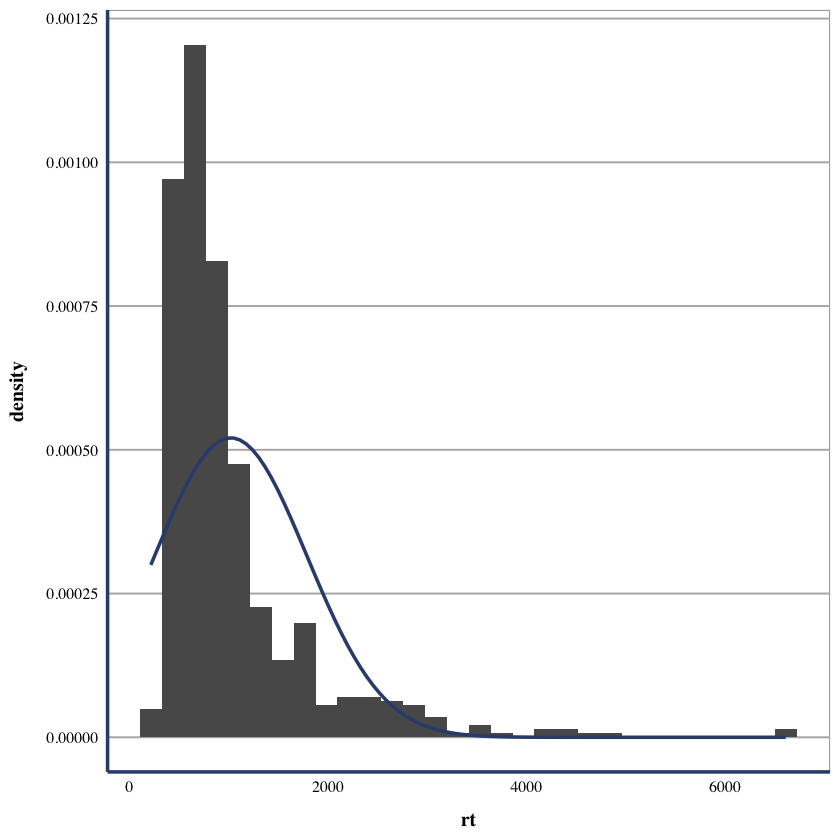

In [10]:
skewed_plot <- df_clean %>%
    ggplot(aes(x = rt)) +
    geom_histogram(aes(y = ..density..)) +
    stat_function(
        fun = dnorm,
        args = list(mean = mean(df_clean$rt), sd = sd(df_clean$rt)),
        linewidth = 1,
        color = accent_color
    )
skewed_plot


A first strategy that can be performed to normalize the data is converting the continuos variable, RTs, into a logarithmic scale.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


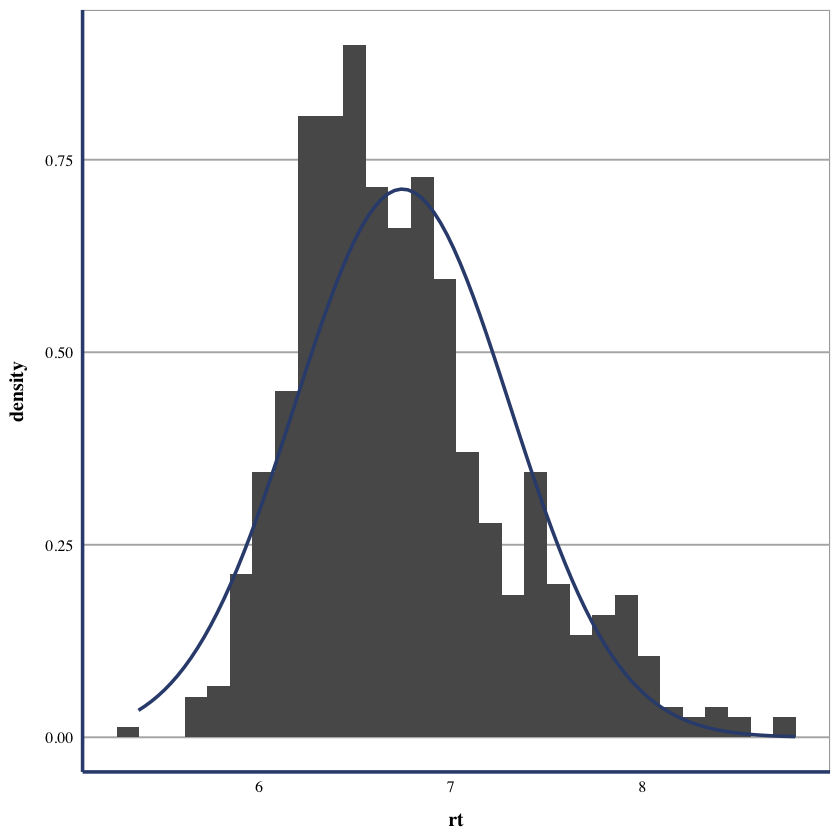

In [11]:
df_clean <- df_clean %>%
    mutate(rt = log(rt))

normal_plot <- df_clean %>%
    ggplot(aes(x = rt)) +
    geom_histogram(aes(y = ..density..)) +
    stat_function(
        fun = dnorm,
        args = list(mean = mean(df_clean$rt), sd = sd(df_clean$rt)),
        linewidth = 1,
        color = accent_color
    )
normal_plot


The second strategy to normalize the data is removing extreme values, or outliers, which might be causing the data to be left-skewed.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


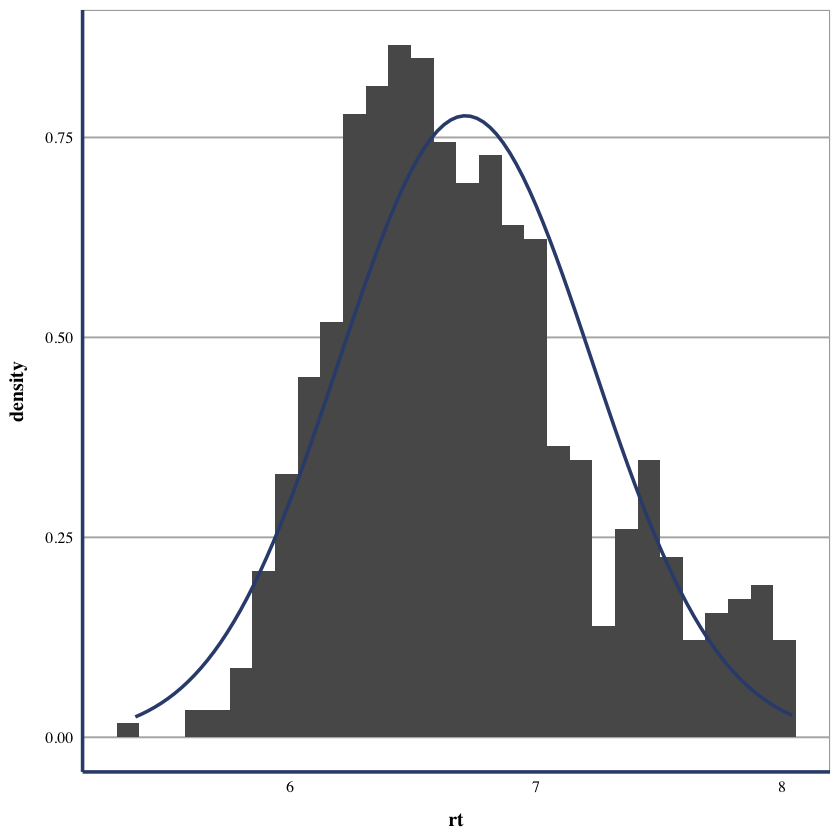

In [12]:
q1 <- quantile(df_clean$rt, 0.25)
q3 <- quantile(df_clean$rt, 0.75)
iqr <- q3 - q1
lower_limit <- q1 - iqr * 1.5
upper_limit <- q3 + iqr * 1.5

df_clean <- df_clean %>%
    filter(.$rt > lower_limit & .$rt < upper_limit)

no_outlier_plot <- df_clean %>%
    ggplot(aes(x = rt)) +
    geom_histogram(aes(y = ..density..)) +
    stat_function(
        fun = dnorm,
        args = list(mean = mean(df_clean$rt), sd = sd(df_clean$rt)),
        linewidth = 1,
        color = accent_color
    )
no_outlier_plot


Checking normality.



	Shapiro-Wilk normality test

data:  df_clean$rt
W = 0.96965, p-value = 4.179e-10


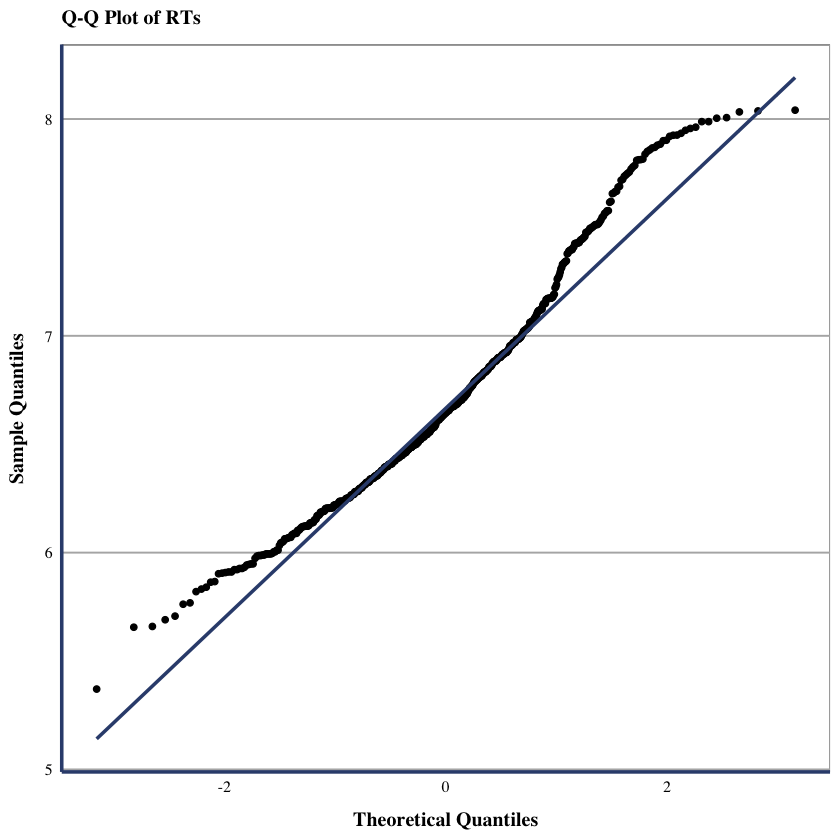

In [13]:
shapiro.test(df_clean$rt)

qq_plot <- df_clean %>%
    ggplot(aes(sample = rt)) +
    stat_qq() +
    stat_qq_line(color = accent_color, linewidth = 1) +
    labs(title = "Q-Q Plot of RTs", x = "Theoretical Quantiles", y = "Sample Quantiles")
qq_plot


#### Merging Experiment and Participant Data Sets


In [14]:
df_part$part_experiment <- NULL

df_merged <- merge(df_clean, df_part, by = "part_id")
df_merged


part_id,task,item_number,item_type,clause_type,number,matching,segment,rt,correct,...,part_impaired.,part_abroad,part_certificate,part_cat_exp,part_cat_pro,part_spa_exp,part_spa_pro,part_eng_exp,part_eng_pro,part_eng_onset_time
<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
29,item,8,exp_item,OR,SS,Match,S3,6.874198,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,> 5h,> 5h,1h - 3h,6
29,item,8,exp_item,OR,SS,Match,S4,6.715383,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,> 5h,> 5h,1h - 3h,6
29,item,8,exp_item,SR,PS,Mismatch,S3,6.529419,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,> 5h,> 5h,1h - 3h,6
29,item,8,exp_item,SR,PS,Mismatch,S4,7.147559,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,> 5h,> 5h,1h - 3h,6
29,item,8,exp_item,SR,PS,Mismatch,S5,7.191429,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,> 5h,> 5h,1h - 3h,6
29,item,8,exp_item,SR,PP,Match,S1,6.124683,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,> 5h,> 5h,1h - 3h,6
29,item,8,exp_item,SR,PP,Match,S2,6.352629,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,> 5h,> 5h,1h - 3h,6
29,item,8,exp_item,SR,PP,Match,S3,6.423247,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,> 5h,> 5h,1h - 3h,6
29,item,8,exp_item,SR,PP,Match,S4,6.437752,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,> 5h,> 5h,1h - 3h,6


### 3. RQ1: Clause Type Effects


Three regression models are created using the `lmer()` function.

- `lm_clause` checks for the correlation between RTs and clause type. Significantly higher RTs are expected for ORs.
- `lm_matching` checks for the interaction between clause type and matching on RTs. A significant effect of mismatch condition is expected in ORs but not in SRs.
- `lm_segment` checks for the interaction between clause type and segment on RTs. A significant effect of clause type is expected in segments 3, 4 and 5. The rest are filtered out.


#### Regression Model


In [15]:
lm_clause <- df_merged %>%
    filter(segment %in% c("S3", "S4")) %>%
    lmer(data = ., rt ~ clause_type + (1 | part_eng_pro) + (1 | part_eng_exp) + (1 | part_id))
summary(lm_clause)


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt ~ clause_type + (1 | part_eng_pro) + (1 | part_eng_exp) +  
    (1 | part_id)
   Data: .

REML criterion at convergence: 252.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.96255 -0.77814 -0.08117  0.69778  2.47518 

Random effects:
 Groups       Name        Variance  Std.Dev. 
 part_id      (Intercept) 8.980e-04 2.997e-02
 part_eng_exp (Intercept) 5.950e-02 2.439e-01
 part_eng_pro (Intercept) 4.577e-11 6.765e-06
 Residual                 2.178e-01 4.667e-01
Number of obs: 185, groups:  part_id, 3; part_eng_exp, 2; part_eng_pro, 2

Fixed effects:
               Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)     6.82712    0.18026   1.06964  37.873 0.013245 *  
clause_typeOR   0.25182    0.06868 181.01737   3.667 0.000323 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
claus_typOR

#### Table


In [16]:
lm_clause_tidy <- lm_clause %>%
    tidy() %>%
    filter(effect == "fixed") %>%
    mutate(
        estimate = exp(estimate),
        p.value = case_when(
            p.value < 0.001 ~ "< 0.001",
            p.value < 0.01 ~ "< 0.01",
            p.value < 0.05 ~ "< 0.05",
            p.value > 0.05 ~ "> 0.05",
        ),
        term = case_when(
            term == "(Intercept)" ~ "SR (Baseline)",
            term == "clause_typeOR" ~ "OR"
        ),
        code = case_when(
            p.value == "< 0.001" ~ "***",
            p.value == "< 0.01" ~ "**",
            p.value == "< 0.05" ~ "*",
            p.value == "> 0.05" ~ " "
        )
    )

lm_clause_tidy


effect,group,term,estimate,std.error,statistic,df,p.value,code
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
fixed,NA,SR (Baseline),922.532539,0.18026333,37.87305,1.069645,< 0.05,*
fixed,NA,OR,1.286367,0.06868056,3.66657,181.017370,< 0.001,***


In [17]:
lm_clause_table <- lm_clause_tidy %>%
    gt() %>%
    cols_hide(columns = c(effect, group, df)) %>%
    tab_options(
        table.width = 565,
        table.font.names = "Times",
        table.font.size = 12,
        table.border.top.width = 0,
        heading.title.font.size = 12,
        heading.subtitle.font.size = 11,
        heading.border.bottom.color = accent_color,
        column_labels.font.weight = "bold",
        column_labels.background.color = accent_color
    ) %>%
    tab_header(
        title = md("**Mixed Model Results**"),
        subtitle = md("**Clause Type**")
    ) %>%
    cols_label(
        term = "Condition",
        estimate = "Estimate (ms)",
        std.error = "Std. Error",
        statistic = md("*t*-value"),
        p.value = md("*p*-value"),
        code = "Signif. Code"
    ) %>%
    fmt_number(
        columns = c(term, estimate, std.error, statistic, p.value),
        decimals = 3
    )

display_html(as_raw_html(lm_clause_table))
gtsave(lm_clause_table, filename = "clause_type_table.png", path = tables_path)


<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: Times; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 12px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: 565px; border-top-style: solid; border-top-width: 0px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" width="565" bgcolor="#FFFFFF">
 
 
 Mixed Model Results 
 
 
 <td colspan="6" class="gt_heading gt_subtitle gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 11px; padding-top: 3px; padding-bottom: 5px; padding-left: 5px; padding-right: 5px; border-top-color: #FFFFFF; border-top-width: 0; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #354C7C; font-weight: normal;" bgcolor="#FFFFFF" align="center"> Clause Type 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="term" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#354C7C" valign="bottom" align="left">Condition 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="estimate" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#354C7C" valign="bottom" align="right">Estimate (ms) 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="std.error" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#354C7C" valign="bottom" align="right">Std. Error 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="statistic" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#354C7C" valign="bottom" align="right"> t -value 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1"

file:////var/folders/l7/2mdpz2wn395f0w8khq_kf29h0000gn/T//Rtmpag3ViB/file31d0212491e9.html screenshot completed



#### Plots


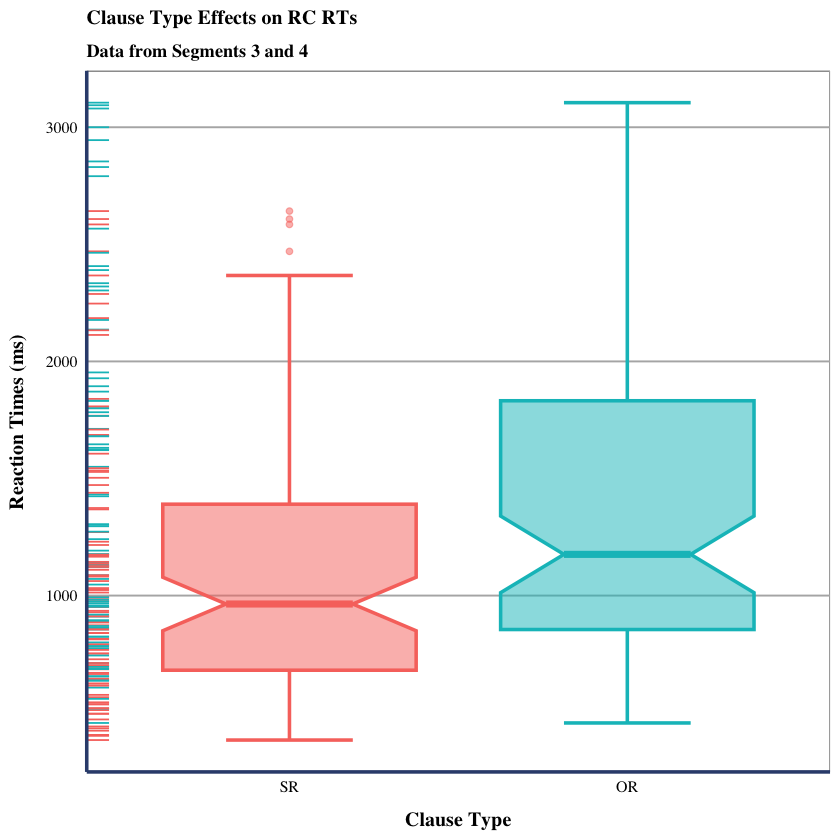

In [18]:
lm_clause_plot <- df_merged %>%
    filter(segment %in% c("S3", "S4")) %>%
    ggplot(
        aes(
            y = exp(rt),
            x = clause_type,
            color = clause_type,
            fill = clause_type
        )
    ) +
    geom_boxplot(
        show.legend = FALSE,
        staplewidth = 0.5,
        notch = TRUE,
        alpha = 0.5,
        linewidth = 1
    ) +
    geom_rug(
        show.legend = FALSE,
        sides = "l"
    ) +
    labs(
        title = "Clause Type Effects on RC RTs",
        subtitle = "Data from Segments 3 and 4",
        x = "Clause Type",
        y = "Reaction Times (ms)"
    )
lm_clause_plot

ggsave(filename = "lm_clause_plot.svg", path = plots_path, height = 6, width = 5)


### 4. RQ2: Number Effects


#### Regression Model


In [19]:
lm_number <- df_merged %>%
    filter(segment %in% c("S3", "S4")) %>%
    lmer(data = ., rt ~ clause_type * number + (1 | part_eng_exp) + (1 | part_eng_pro) + (1 | part_id))
summary(lm_number)


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt ~ clause_type * number + (1 | part_eng_exp) + (1 | part_eng_pro) +  
    (1 | part_id)
   Data: .

REML criterion at convergence: 261.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.24390 -0.66390 -0.04121  0.66453  2.60318 

Random effects:
 Groups       Name        Variance  Std.Dev.
 part_id      (Intercept) 0.0009086 0.03014 
 part_eng_pro (Intercept) 0.0000000 0.00000 
 part_eng_exp (Intercept) 0.0591759 0.24326 
 Residual                 0.2182635 0.46719 
Number of obs: 185, groups:  part_id, 3; part_eng_pro, 2; part_eng_exp, 2

Fixed effects:
                         Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)              6.773433   0.197890   1.568356  34.228  0.00305 **
clause_typeOR            0.375636   0.136330 175.053239   2.755  0.00648 **
numberPP                -0.007698   0.134865 175.002904  -0.057  0.95455   
numberSP          

#### Table


In [20]:
lm_number_tidy <- lm_number %>%
    tidy() %>%
    filter(effect == "fixed") %>%
    mutate(
        estimate = exp(estimate),
        p.value = case_when(
            p.value < 0.001 ~ "< 0.001",
            p.value < 0.01 ~ "< 0.01",
            p.value < 0.05 ~ "< 0.05",
            p.value > 0.05 ~ "> 0.05",
        ),
        term = case_when(
            term == "(Intercept)" ~ "SR * SS (Baseline)",
            term == "clause_typeOR" ~ "OR",
            term == "numberPP" ~ "PP",
            term == "numberSP" ~ "SP",
            term == "numberPS" ~ "PS",
            term == "clause_typeOR:numberPP" ~ "OR * PP",
            term == "clause_typeOR:numberSP" ~ "OR * SP",
            term == "clause_typeOR:numberPS" ~ "OR * PS",
        ),
        code = case_when(
            p.value == "< 0.001" ~ "***",
            p.value == "< 0.01" ~ "**",
            p.value == "< 0.05" ~ "*",
            p.value == "> 0.05" ~ " "
        )
    )

lm_number_tidy


effect,group,term,estimate,std.error,statistic,df,p.value,code
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
fixed,NA,SR * SS (Baseline),874.3079859,0.1978900,34.22827516,1.568356,< 0.01,**
fixed,NA,OR,1.4559170,0.1363297,2.75534972,175.053239,< 0.01,**
fixed,NA,PP,0.9923320,0.1348652,-0.05707575,175.002904,> 0.05,
fixed,NA,SP,1.0372182,0.1348652,0.27095458,175.002904,> 0.05,
fixed,NA,PS,1.2051401,0.1348652,1.38357260,175.002904,> 0.05,
fixed,NA,OR * PP,0.8186182,0.1939107,-1.03211172,175.028252,> 0.05,
fixed,NA,OR * SP,0.8915290,0.1951779,-0.58826993,175.114776,> 0.05,
fixed,NA,OR * PS,0.8294132,0.1927973,-0.97012140,175.100988,> 0.05,


In [21]:
lm_number_table <- lm_number_tidy %>%
    gt() %>%
    cols_hide(columns = c(effect, group, df)) %>%
    tab_options(
        table.width = 565,
        table.font.names = "Times",
        table.font.size = 12,
        table.border.top.width = 0,
        heading.title.font.size = 12,
        heading.subtitle.font.size = 11,
        column_labels.font.weight = "bold",
        heading.border.bottom.color = accent_color,
        column_labels.background.color = accent_color
    ) %>%
    tab_header(
        title = md("**Mixed Model Results**"),
        subtitle = md("**Number and ORs**")
    ) %>%
    cols_label(
        term = "Condition",
        estimate = "Estimate (ms)",
        std.error = "Std. Error",
        statistic = md("*t*-value"),
        p.value = md("*p*-value"),
        code = "Signif. Code"
    ) %>%
    fmt_number(
        columns = c(term, estimate, std.error, statistic, p.value),
        decimals = 3
    )

display_html(as_raw_html(lm_number_table))
gtsave(lm_number_table, filename = "number_table.png", path = tables_path)


<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: Times; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 12px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: 565px; border-top-style: solid; border-top-width: 0px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" width="565" bgcolor="#FFFFFF">
 
 
 Mixed Model Results 
 
 
 <td colspan="6" class="gt_heading gt_subtitle gt_font_normal gt_bottom_border" style="border-style: none; color: #333333; font-size: 11px; padding-top: 3px; padding-bottom: 5px; padding-left: 5px; padding-right: 5px; border-top-color: #FFFFFF; border-top-width: 0; background-color: #FFFFFF; text-align: center; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #354C7C; font-weight: normal;" bgcolor="#FFFFFF" align="center"> Number and ORs 
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="term" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#354C7C" valign="bottom" align="left">Condition 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="estimate" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#354C7C" valign="bottom" align="right">Estimate (ms) 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="std.error" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#354C7C" valign="bottom" align="right">Std. Error 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="statistic" style="border-style: none; color: #FFFFFF; background-color: #354C7C; font-size: 100%; font-weight: bold; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#354C7C" valign="bottom" align="right"> t -value 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan=

file:////var/folders/l7/2mdpz2wn395f0w8khq_kf29h0000gn/T//Rtmpag3ViB/file31d049718fa0.html screenshot completed



#### Plots


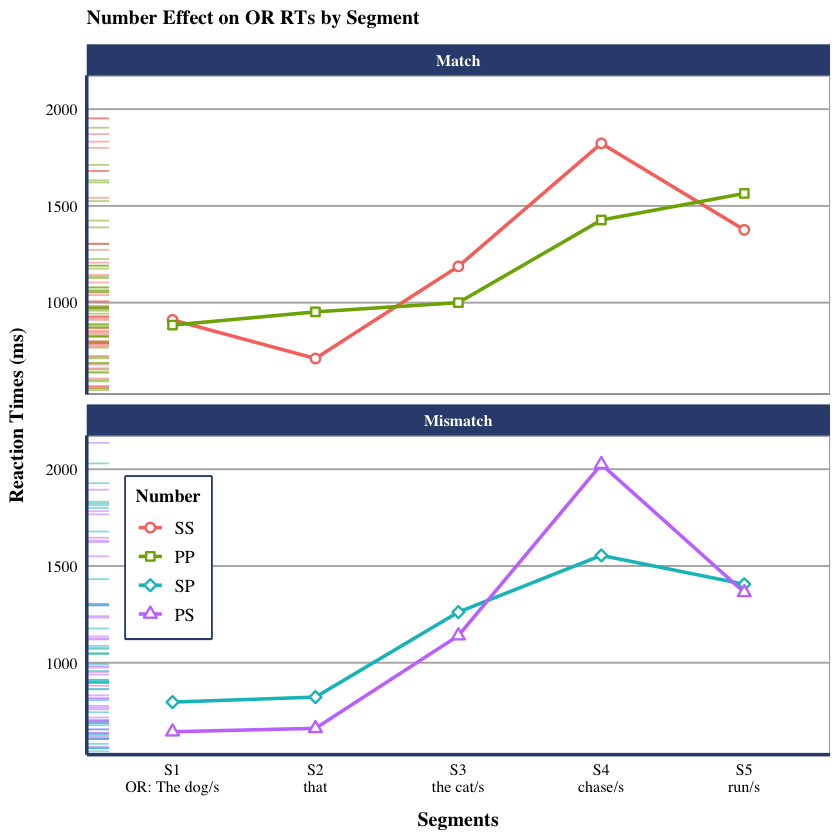

In [32]:
lm_number_plot2 <- df_merged %>%
    filter(clause_type == "OR") %>%
    ggplot(
        aes(
            y = exp(rt),
            x = segment,
            color = number,
            group = number
        )
    ) +
    stat_summary(
        fun = mean,
        geom = "line",
        linewidth = 1
    ) +
    stat_summary(
        aes(shape = number),
        fun = mean,
        geom = "point",
        size = 2,
        stroke = 1,
        fill = "white"
    ) +
    geom_rug(
        show.legend = FALSE,
        sides = "l",
        alpha = 0.5
    ) +
    coord_cartesian(ylim = c(600, 2100)) +
    scale_shape_manual(
        values = c(21, 22, 23, 24)
    ) +
    scale_x_discrete(
        labels = c(
            "S1\nOR: The dog/s",
            "S2\nthat",
            "S3\nthe cat/s",
            "S4\nchase/s",
            "S5\nrun/s"
        )
    ) +
    labs(
        title = "Number Effect on OR RTs by Segment",
        x = "Segments",
        y = "Reaction Times (ms)"
    ) +
    guides(
        color = guide_legend("Number"),
        shape = guide_legend("Number")
    ) +
    theme(
        legend.position = c(0.11, 0.29),
        legend.box.background = element_rect(linewidth = 1, color = accent_color, linetype = "solid"),
        legend.text = element_text(size = 11),
        legend.title = element_text(size = 11)
    ) +
    facet_wrap(~matching, dir = "v")
lm_number_plot2

ggsave(filename = "lm_number_segment_plot.svg", path = plots_path, height = 15, width = 15, units = "cm")
